In [7]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style = 'white')

In [8]:
telecom_cust = pd.read_csv("churn_data.csv")

In [9]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Checking for any missing values.

In [11]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values for Total Charges. Let us remove these 11 rows from our data set

In [13]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables using one-hot encoding
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

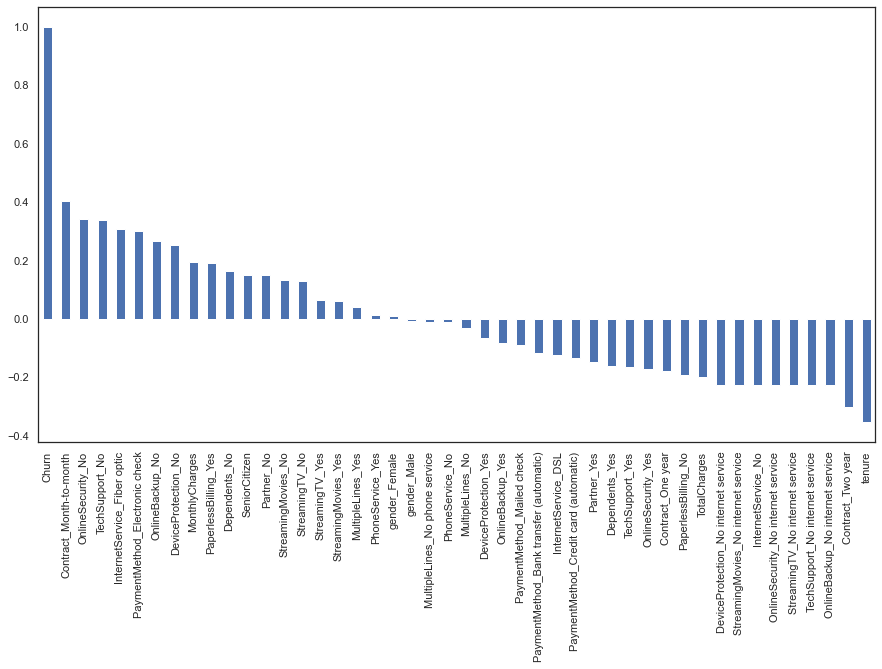

In [14]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Observations:
1. Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn. 

2. Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

## Data Exploration



***Demographics*** - Let us first understand the gender, age range, partner and dependent status of the customers

1. **Gender Distribution** - About half of the customers in our data set are male while the other half are female

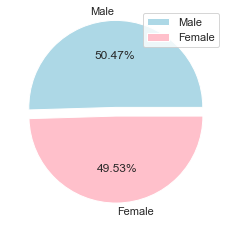

In [15]:
colors = ['lightblue','pink']
x = round(telecom_cust["gender"].value_counts()/telecom_cust.shape[0]*100,2)
plt.pie(x,labels = ["Male", "Female"],colors=colors,  explode = [0.1,0], autopct= '%.2f%%')
plt.legend()
plt.show()

2. **% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


Text(0.5, 1.0, '% of Senior Citizens')

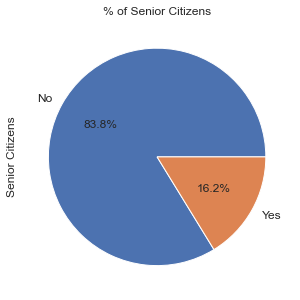

In [16]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

3. **Partner and dependent status**  - About 50% of the customers have a partner, while only 30% of the total customers have dependents. 

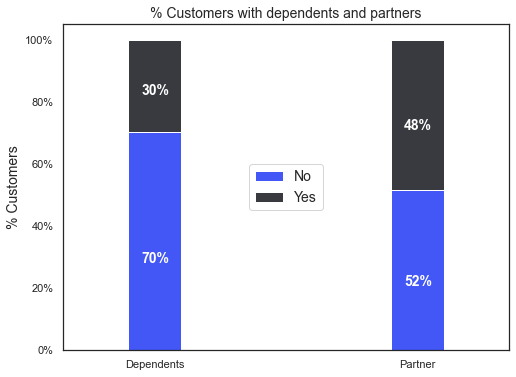

In [17]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4257f5','#393a40']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,figsize=(8,6),rot = 0,width = 0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

Half of the customers who have partners, also have dependents, while the other half do not.
Interestingly, customers who do not have partners, 80% of them do not have dependents.

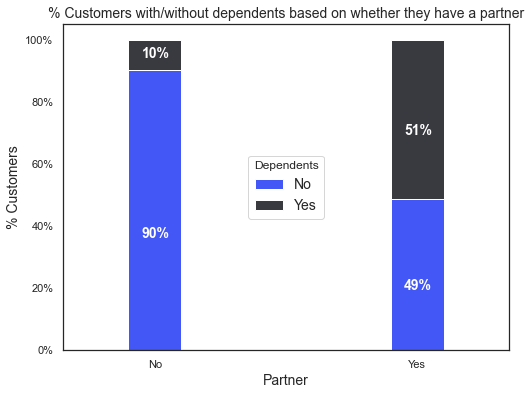

In [18]:
colors = ['#4257f5','#393a40']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

There is no difference in the % of customers with/without dependents and partners by gender.

**Customer Account Information**:  Let u now look at the tenure, contract

**1. Tenure:**  

C:\Users\Aston\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

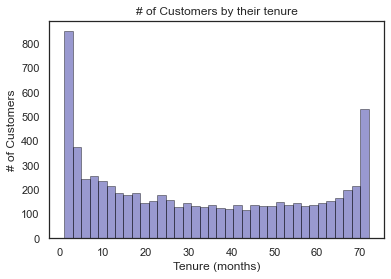

In [19]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Looking at the above histogram, we can see that a lot of customers have been with the telecom company for just a month, while quite a many were there for about 72 months. This could potentially be because different customers have different contracts. Thus depending on the contract, there could be more/less easier for the customers to stay/leave the telecom company.

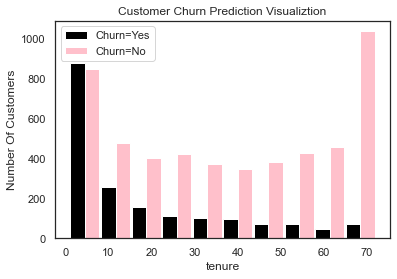

In [20]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
tenure_churn_no = telecom_cust[telecom_cust.Churn=='No'].tenure
tenure_churn_yes = telecom_cust[telecom_cust.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['black','pink'],label=['Churn=Yes','Churn=No'])
plt.legend()

**2. Contracts:**

Text(0.5, 1.0, '# of Customers by Contract Type')

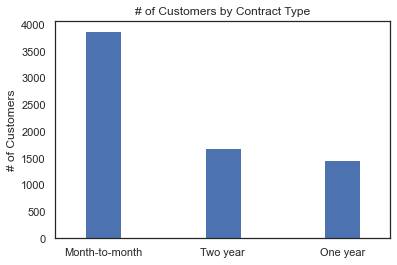

In [21]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Most of the customers are in a month-to-month contract.
While there are fairly equal number of customers in the 1 year and 2 year contracts.



C:\Users\Aston\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

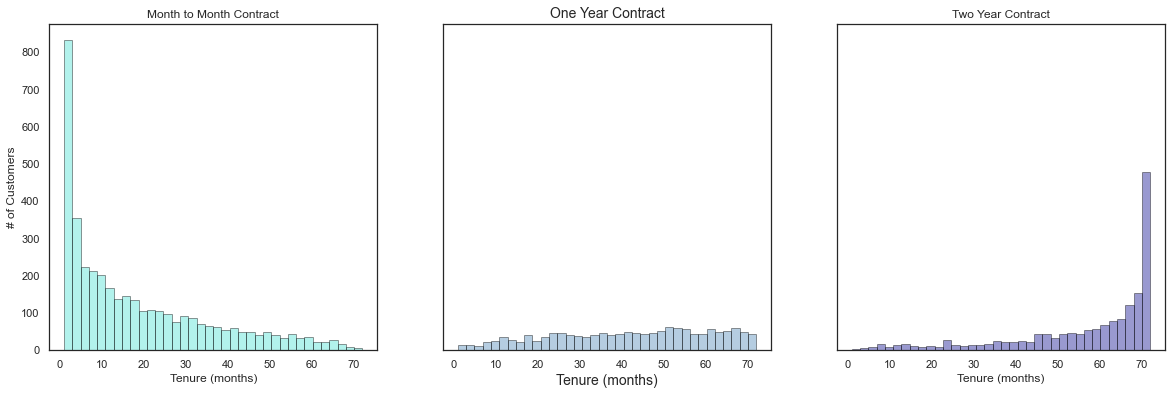

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Majority of the customers having month-to-month contract last for 1-2 months, while customers with 2-year contracts tend to last for about 70 months. This implies that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. 

This is also what we saw in the earlier chart on correlation with the churn rate. 


**Distribution of various services used by customers**

In [23]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

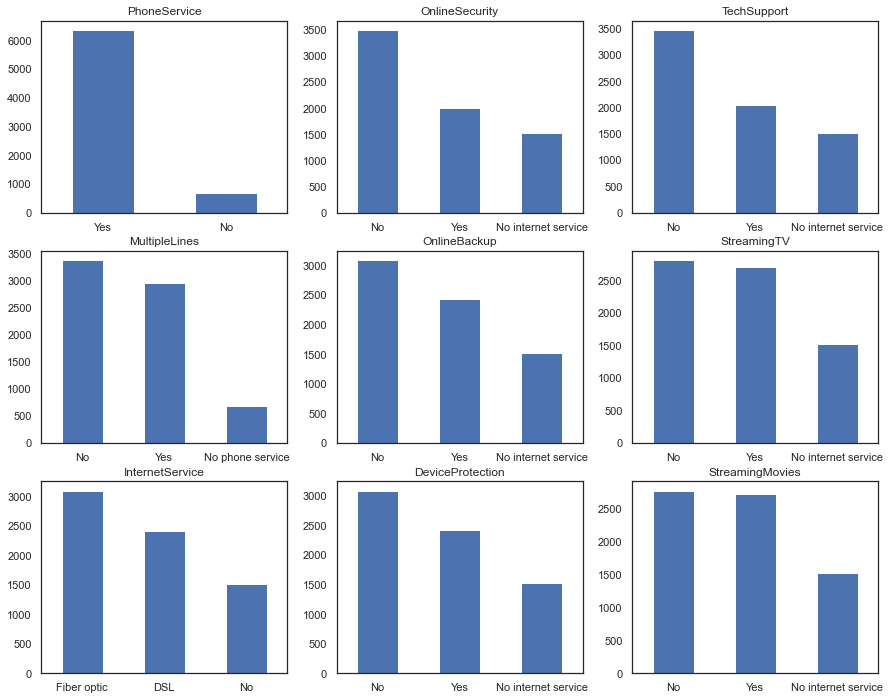

In [24]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

**Relation between monthly and total charges**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

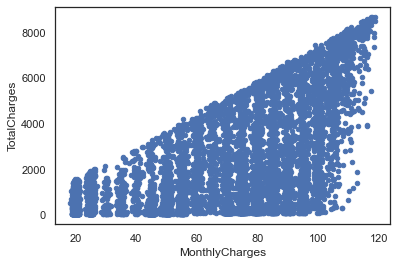

In [25]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

Total charges increases as the monthly bill for a customer increases.

### Predictor variable (Churn) vs other important variables

**1. Churn rate in the data**

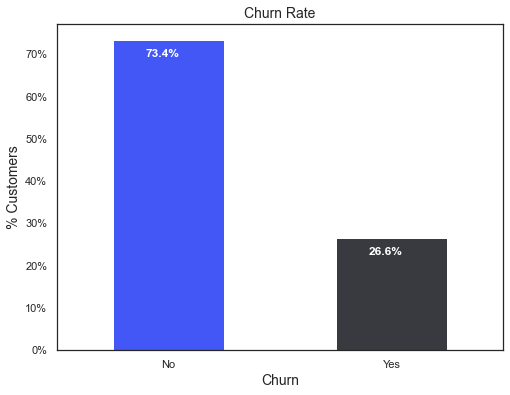

In [26]:
colors = ['#4257f5','#393a40']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.0,str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white',weight = 'bold')

74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn.

**2. Churn rate vs tenure, seniority, contract type, monthly charges and total charges**

**i.) Churn vs Tenure**:

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

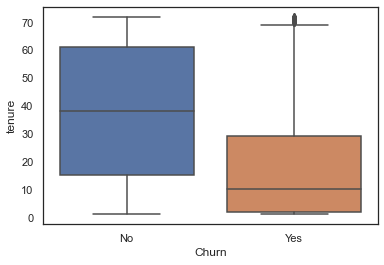

In [27]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

The customers who do not churn, they tend to stay for a longer tenure

**ii.) Churn by Contract Type**:


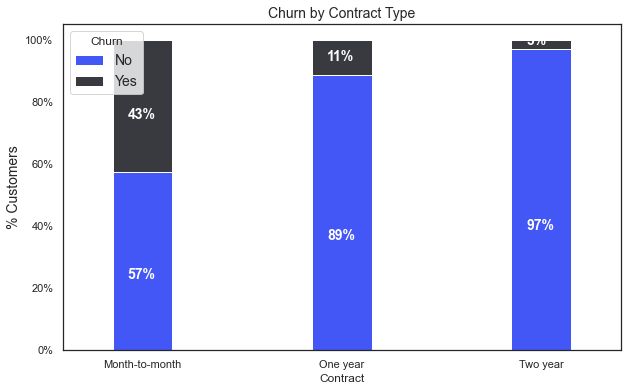

In [28]:
colors = ['#4257f5','#393a40']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

The customers who have a month-to-month contract have a very high churn rate.

**iii.) Churn by Seniority**:

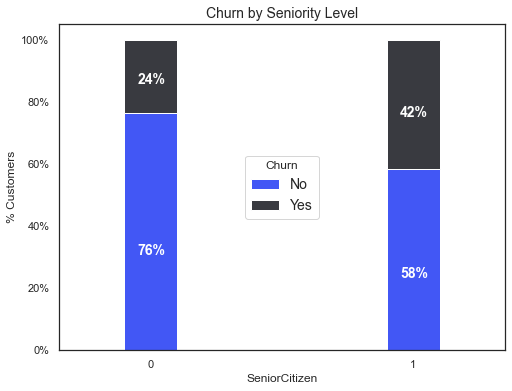

In [29]:
colors = ['#4257f5','#393a40']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size =14)

Senior Citizens have almost double the churn rate than younger population.

**iv.) Churn by Monthly Charges**: 

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

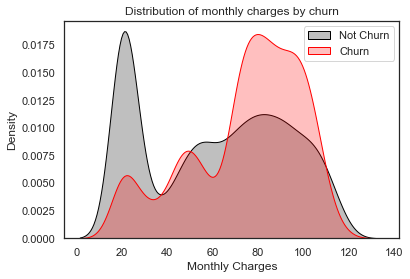

In [30]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="black", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

As monthly charges increase, % of customers who churn also increase.

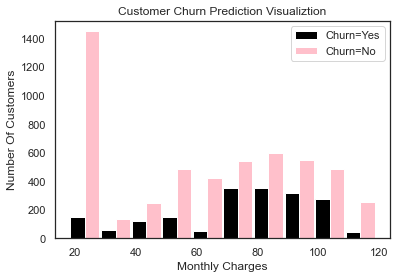

In [31]:
mc_churn_no = telecom_cust[telecom_cust.Churn=='No'].MonthlyCharges      
mc_churn_yes = telecom_cust[telecom_cust.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['black','pink'],label=['Churn=Yes','Churn=No'])
plt.legend()

**v.) Churn by Total Charges**: 

Text(0.5, 1.0, 'Distribution of total charges by churn')

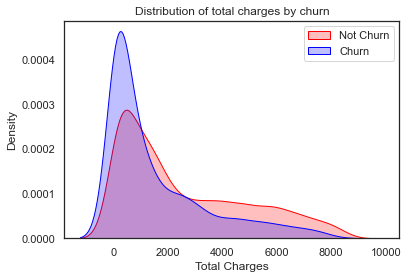

In [32]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

When the total charges are low, there is a high churn rate, which is weird.

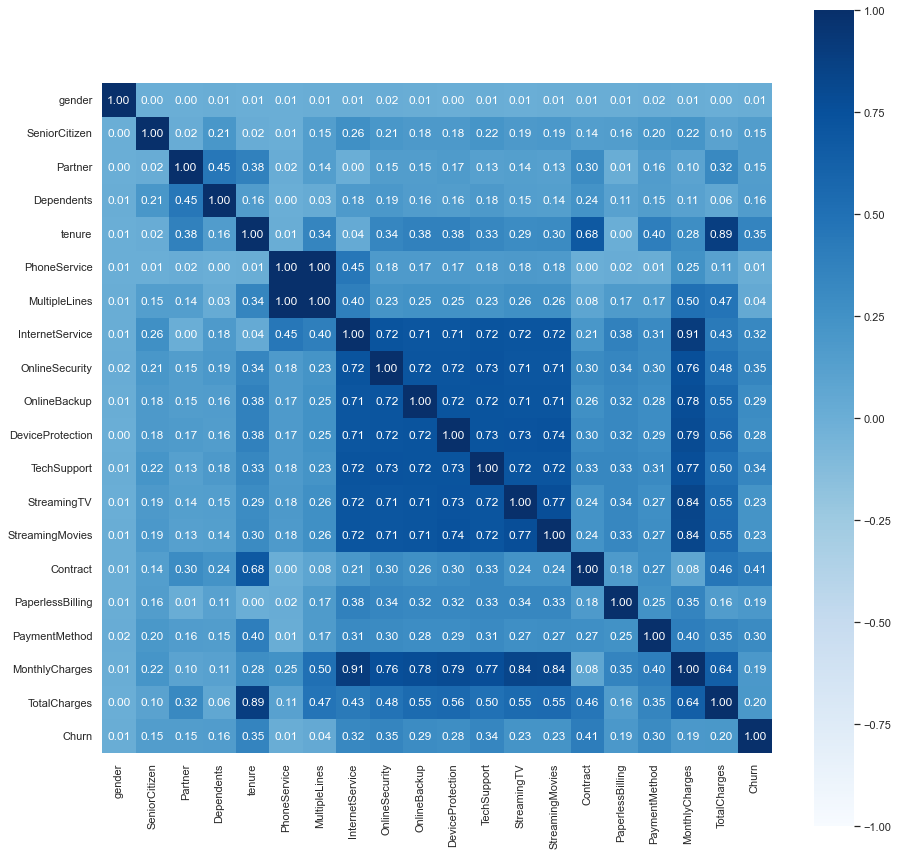

{'corr':                     gender  SeniorCitizen   Partner  Dependents    tenure  \
 gender            1.000000       0.001434  0.001094    0.010038  0.005285   
 SeniorCitizen     0.001434       1.000000  0.016571    0.210129  0.015683   
 Partner           0.001094       0.016571  1.000000    0.451958  0.381912   
 Dependents        0.010038       0.210129  0.451958    1.000000  0.163386   
 tenure            0.005285       0.015683  0.381912    0.163386  1.000000   
 PhoneService      0.007034       0.007739  0.017916    0.000552  0.007877   
 MultipleLines     0.010314       0.146730  0.144302    0.025025  0.343997   
 InternetService   0.011202       0.264920  0.001277    0.178412  0.037532   
 OnlineSecurity    0.016344       0.210728  0.151911    0.192981  0.336994   
 OnlineBackup      0.013095       0.182546  0.153303    0.161155  0.377006   
 DeviceProtection  0.004866       0.182831  0.165903    0.155949  0.377311   
 TechSupport       0.008740       0.223709  0.127510    

In [33]:
from dython.nominal import associations
associations(telecom_cust,numerical_columns=['tenure','MonthlyCharges','TotalCharges'] ,nom_nom_assoc='cramer',num_num_assoc='spearman',cramers_v_bias_correction=False,
             hide_columns='customerID',hide_rows='customerID',figsize=(15, 15),cmap="Blues")

**1. Logistic Regression**

In [35]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1. This helped  improve the accuracy from 79.7% to 80.7%. Furthermore, you will notice below that the importance of variables is also aligned with what we are seeing in Random Forest algorithm and the EDA we conducted above.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [38]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, prediction_test))

Accuracy:  0.8075829383886256


**Logistic Regression with L2 Regularization**

In [64]:
model1=LogisticRegression(penalty="l2",C=100,solver="liblinear",verbose=50)
result = model1.fit(X_train, y_train)
prediction_test = model1.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, prediction_test))

[LibLinear]iter  1 act 1.165e+05 pre 1.041e+05 delta 1.106e+00 f 3.412e+05 |g| 3.227e+05 CG   3
iter  2 act 1.669e+04 pre 1.411e+04 delta 1.157e+00 f 2.246e+05 |g| 6.661e+04 CG   5
iter  3 act 3.048e+03 pre 2.690e+03 delta 1.157e+00 f 2.079e+05 |g| 2.005e+04 CG   5
cg reaches trust region boundary
iter  4 act 6.411e+02 pre 6.202e+02 delta 1.322e+00 f 2.049e+05 |g| 4.293e+03 CG   8
cg reaches trust region boundary
iter  5 act 3.861e+02 pre 3.860e+02 delta 1.414e+00 f 2.043e+05 |g| 1.405e+03 CG   9
cg reaches trust region boundary
iter  6 act 2.395e+02 pre 2.348e+02 delta 1.447e+00 f 2.039e+05 |g| 1.582e+03 CG  14
cg reaches trust region boundary
iter  7 act 4.622e+01 pre 4.551e+01 delta 1.495e+00 f 2.036e+05 |g| 6.315e+02 CG  18
cg reaches trust region boundary
iter  8 act 3.836e+01 pre 3.842e+01 delta 1.604e+00 f 2.036e+05 |g| 1.832e+02 CG  18
iter  9 act 8.066e+00 pre 8.069e+00 delta 1.604e+00 f 2.035e+05 |g| 4.439e+02 CG   8
cg reaches trust region boundary
iter 10 act 1.726e+01 pre 

AxesSubplot(0.125,0.11;0.775x0.77)


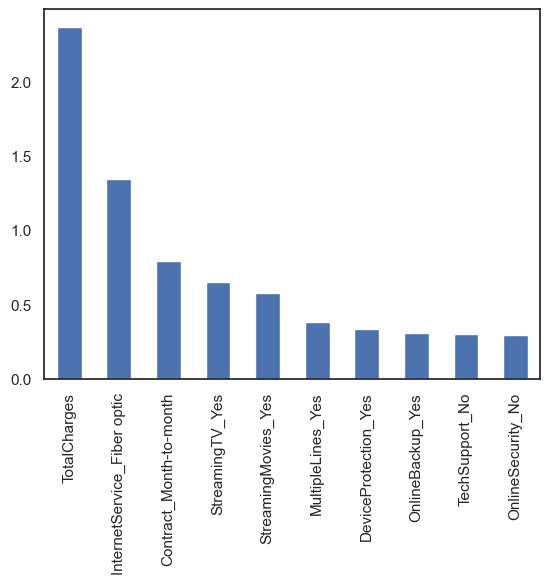

In [65]:
weights = pd.Series(model1.coef_[0],index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.11;0.775x0.77)


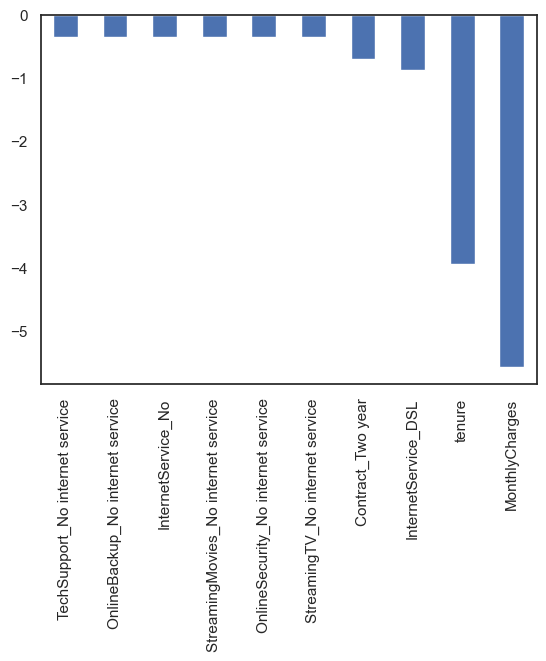

In [66]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

**Observations**

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:
* As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
* Having DSL internet service also reduces the proability of Churn
* Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are  likely to churn because of it. I think we need to explore more to better understad why this is happening. 

Any hypothesis on the above would be really helpful! 

**2. Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=300 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print("Accuracy Score: ",metrics.accuracy_score(y_test, prediction_test))
print("R2 score: ",model_rf.score(X_train, y_train))
print("RMSE value: ",np.sqrt(metrics.mean_squared_error(y_test,prediction_test)))

/Users/aatishkayyath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score:  0.8095238095238095
R2 score:  0.8126222222222222
RMSE value:  0.4364357804719847


**Random Forest with RandomizedSearchCV to find the best parameters**

In [38]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 5)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [39]:
import time
t1 = time.time()
rf2 = RandomForestClassifier() 
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 180, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf2_random.fit(X_train, y_train)
t2 =time.time()

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/Users/aatishkayyath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aatishkayyath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aatishkayyath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

In [40]:
rf2_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [41]:
print("Accuracy Score: ",metrics.accuracy_score(y_test, prediction_test))
print("R2 score: ",rf2_random.score(X_train, y_train))
y_pred= rf2_random.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy Score:  0.8095238095238095
R2 score:  0.8458666666666667
RMSE:  0.4315226507984218


**Slight increase in R2 score**

In [42]:
rf3=RandomForestClassifier(n_estimators=300 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",min_samples_split=5,min_samples_leaf= 2,
                                  max_leaf_nodes = 30,max_depth= 10, bootstrap= True)
rf3.fit(X_train, y_train)

/Users/aatishkayyath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', max_leaf_nodes=30,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=50)

<AxesSubplot: >

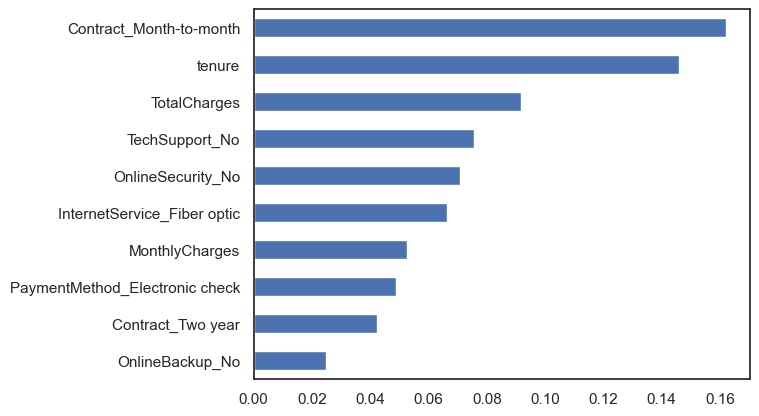

In [43]:
importances = rf3.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

**Observations:**

* From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
* The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.metrics import mean_squared_error, r2_score, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

**3. KNN**

In [39]:
X=df_dummies.drop('Churn',axis=1)
y=df_dummies['Churn']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=101)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred_test = knn.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))
print("R2 score: ",knn.score(X_train, y_train))
y_pred= knn.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy Score:  0.7578199052132701
R2 score:  0.8356359203575782
RMSE:  0.4921179683640193


In [46]:
knn_params = {'n_neighbors':np.arange(1, 101), 'weights':['uniform','distance']}

rand = GridSearchCV(knn, knn_params, cv = 5)

rand.fit(X_train, y_train)

print(rand.best_params_)

rand_best_knn = rand.best_params_

KNN = KNeighborsClassifier(**rand_best_knn)

KNN.fit(X_train,y_train)

{'n_neighbors': 65, 'weights': 'uniform'}


KNeighborsClassifier(n_neighbors=65)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1580
           1       0.58      0.58      0.58       530

    accuracy                           0.79      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110



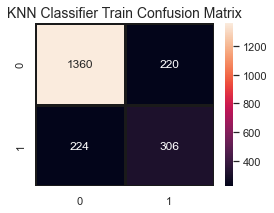

Accuracy Score:  0.7895734597156399
R2 score:  0.7937830150345389
RMSE:  0.4587227270196673


In [47]:
y_pred_test = KNN.predict(X_test)

print(classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN Classifier Train Confusion Matrix",fontsize=14)
plt.show()
print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))
print("R2 score: ",KNN.score(X_train, y_train))
y_pred= KNN.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_test)))

Accuracy Score:  0.7895734597156399
RMSE:  0.4587227270196673


**4. Gradient Boosting Classifier**

In [48]:
X = df_dummies.drop('Churn',axis=1)
y = df_dummies['Churn']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=101)

In [50]:
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))

Accuracy Score:  0.8085308056872038


In [51]:
parameters = {"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(50, 100),
                  "max_depth"    : sp_randInt(2, 8)
                 }

randm = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 10, n_jobs=-1)

randm.fit(X_train, y_train)

print(randm.best_params_)

randm_best_gb = randm.best_params_

gb = GradientBoostingClassifier(**randm_best_gb)

gb.fit(X_train, y_train)

{'learning_rate': 0.15883693780447283, 'max_depth': 2, 'n_estimators': 66, 'subsample': 0.11307338902668729}


GradientBoostingClassifier(learning_rate=0.15883693780447283, max_depth=2,
                           n_estimators=66, subsample=0.11307338902668729)

Test :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1580
           1       0.64      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.81      2110



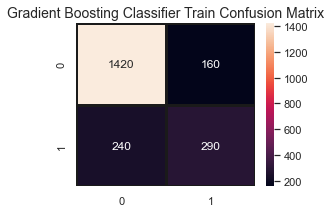

Accuracy Score:  0.8104265402843602
R2 score:  0.8084112149532711
RMSE:  0.4354003441841081


In [52]:
y_pred_test = gb.predict(X_test)

print('Test :')
print(classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Train Confusion Matrix",fontsize=14)
plt.show()
print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))
print("R2 score: ",gb.score(X_train, y_train))
y_pred= gb.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

**5. ADA Boost**

1. Grid Search CV here tries different parameters for the Decision Tree that is being used in the Classfier

In [53]:
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.tree import DecisionTreeClassifier
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier

ModuleNotFoundError: No module named 'hyperopt'

In [75]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50, 100]
             }
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

In [76]:
# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
grid_search_ABC.fit(X_train,y_train)
preds_gcv_dts = grid_search_ABC.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, preds_gcv_dts))

Accuracy 0.7677725118483413


In [77]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf.fit(X_train,y_train)
preds_gcv_abc = model.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, preds_gcv_abc))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Accuracy 0.8075829383886256


**6. XG Boost**

In [79]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [80]:
# GridsearchCV

In [81]:
# Define the search space
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [19,20,21],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [1,1.2,1.5,2,2.3]
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgboost = XGBClassifier()

In [82]:
# Define grid search
grid_search = GridSearchCV(estimator=xgboost, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.8],
                         'reg_alpha': [19, 20, 21],
                         'reg_lambda': [1, 1.2, 1.5, 2, 2.3]},
             refit='accuracy', scoring=['accuracy'])

In [83]:
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
# print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8019
The best hyperparameters are {'colsample_bytree': 0.8, 'reg_alpha': 19, 'reg_lambda': 1.2}


In [84]:
# Bayesian Optimiation

In [85]:
# Space
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}

In [86]:
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [87]:
# Objective function
def objective(params):
    
    xgboost = XGBClassifier(seed=0, **params)
    score = cross_val_score(estimator=xgboost, 
                            X=X_train, 
                            y=y_train, 
                            cv=kfold, 
                            scoring='recall', 
                            n_jobs=-1).mean()
    # Loss is negative score
    loss = - score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [88]:
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = Trials())

100%|████████| 48/48 [00:27<00:00,  1.78trial/s, best loss: -0.5720598709884532]


In [89]:
# Train model using the best parameters
xgboost_bo = XGBClassifier(seed=0, 
                           colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                           gamma=space_eval(space, best)['gamma'], 
                           learning_rate=space_eval(space, best)['learning_rate'], 
                           max_depth=space_eval(space, best)['max_depth'], 
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(X_train,y_train)
# Make prediction using the best model
bayesian_opt_predict = xgboost_bo.predict(X_test)
# Get predicted probabilities
bayesian_opt_predict_prob = xgboost_bo.predict_proba(X_test)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, bayesian_opt_predict)
# Print result
print('Accuracy',metrics.accuracy_score(y_test, bayesian_opt_predict))

Accuracy 0.8099526066350711


In [ ]:
#For prediction of prices
price={'model':["LR",'Lasso','Ridge','RF1','RF2','RF3'],
        "R2":[0.5614250465305188,0.5697512321877805,0.5624400611662361,0.9425691036220928,0.8198476105863151,0.8791790384480884],
        "RMSE":[35.85590896202903,35.81750384917525,35.81439341978083,35.268194187306094,35.050252045597574,34.69343899083022]}
price = pd.DataFrame(price)

reviews={'model':["LR",'Lasso','Ridge','RF1','RF2'],
         "R2":[0.4078951987516869,0.4674301062827887,0.410723640869726,0.9552738972892104,0.8707978428027499],
         "RMSE":[34.44182340304882,34.373425068446295,34.359461867910646,26.438457304423647,26.69317121579258]}
reviews = pd.DataFrame(reviews)